# Part1 Get Case_Status information in year 2011-2016, and percentage of each Case_Status，show result in Pie Chart

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_H1B=pd.read_csv("/Users/huangechen/Desktop/final/data/h1b_Petitions.csv")

In [3]:
df_H1B.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
df_H1B['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

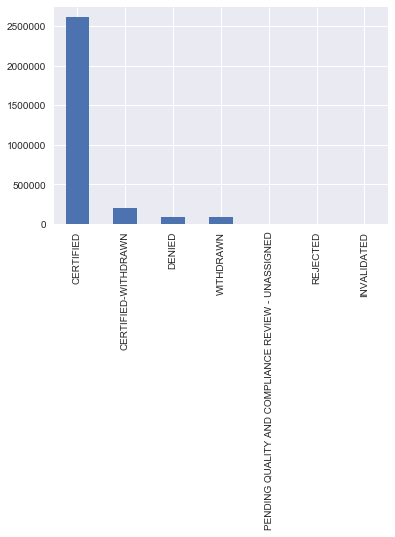

In [5]:
df_H1B['CASE_STATUS'].value_counts().plot(kind='bar')

In [6]:
StutasTpye=df_H1B['CASE_STATUS'].value_counts().index.copy(deep=True).values

In [7]:
StutasTpye

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'INVALIDATED'], dtype=object)

In [8]:
StutasValue=df_H1B['CASE_STATUS'].value_counts().copy().values

In [9]:
StutasValue

array([2615623,  202659,   94346,   89799,      15,       2,       1])

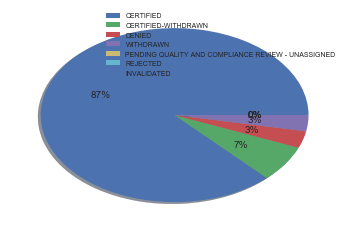

In [10]:
fig = plt.pie(StutasValue,autopct='%1.0f%%', shadow=True)
plt.legend(StutasTpye, loc="best", prop={'size':7})
plt.show()

# PART2 Get Status Percentage between Case_2016 and Case_Total

In [11]:
new_df=df_H1B[['CASE_STATUS','YEAR']]

In [12]:
new_df.head()

,CASE_STATUS,YEAR
0,CERTIFIED-WITHDRAWN,2016.0
1,CERTIFIED-WITHDRAWN,2016.0
2,CERTIFIED-WITHDRAWN,2016.0
3,CERTIFIED-WITHDRAWN,2016.0
4,WITHDRAWN,2016.0


In [13]:
df1=new_df.groupby('CASE_STATUS').count()

In [14]:
df1

,YEAR
CASE_STATUS,
CERTIFIED,2615623
CERTIFIED-WITHDRAWN,202659
DENIED,94346
INVALIDATED,1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15
REJECTED,2
WITHDRAWN,89799


In [15]:
type(new_df['YEAR'][0])

numpy.float64

In [16]:
new_df['YEAR']=pd.to_datetime(new_df['YEAR'])

/Users/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
new_df.head()

,CASE_STATUS,YEAR
0,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
1,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
2,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
3,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
4,WITHDRAWN,1970-01-01 00:00:00.000002016


In [18]:
type(new_df['YEAR'][0])

pandas.tslib.Timestamp

In [19]:
new_df.groupby('YEAR').count()

,CASE_STATUS
YEAR,
1970-01-01 00:00:00.000002011,358767
1970-01-01 00:00:00.000002012,415607
1970-01-01 00:00:00.000002013,442114
1970-01-01 00:00:00.000002014,519427
1970-01-01 00:00:00.000002015,618727
1970-01-01 00:00:00.000002016,647803


In [20]:

new_df = new_df[new_df.YEAR == '1970-01-01 00:00:00.000002016']  

In [21]:
new_df.head()

,CASE_STATUS,YEAR
0,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
1,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
2,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
3,CERTIFIED-WITHDRAWN,1970-01-01 00:00:00.000002016
4,WITHDRAWN,1970-01-01 00:00:00.000002016


In [22]:
df2=new_df.groupby('CASE_STATUS').count()

In [23]:
df2

,YEAR
CASE_STATUS,
CERTIFIED,569646
CERTIFIED-WITHDRAWN,47092
DENIED,9175
WITHDRAWN,21890


In [24]:
df2 = df2.rename(columns={'YEAR':'YEAR_2016'})

In [25]:
df2

,YEAR_2016
CASE_STATUS,
CERTIFIED,569646
CERTIFIED-WITHDRAWN,47092
DENIED,9175
WITHDRAWN,21890


In [26]:
df3=df1.join(df2)

In [27]:
df3

,YEAR,YEAR_2016
CASE_STATUS,,
CERTIFIED,2615623,569646.0
CERTIFIED-WITHDRAWN,202659,47092.0
DENIED,94346,9175.0
INVALIDATED,1,NaN
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15,NaN
REJECTED,2,NaN
WITHDRAWN,89799,21890.0


In [28]:
df3['PERCENTAGE']=df3['YEAR_2016']/df3['YEAR']

In [29]:
df4=df3.reset_index()

In [30]:
df5=df4.dropna()

In [31]:
df5

,CASE_STATUS,YEAR,YEAR_2016,PERCENTAGE
0,CERTIFIED,2615623,569646.0,0.217786
1,CERTIFIED-WITHDRAWN,202659,47092.0,0.232371
2,DENIED,94346,9175.0,0.097248
6,WITHDRAWN,89799,21890.0,0.243767


In [32]:
df5.to_csv('/Users/huangechen/Desktop/final/output/ANA5_PART2.csv')

In [33]:
Case_2016=np.array(list(df5['YEAR_2016']))
Case_Total=np.array(list(df5['YEAR']))
Case_Status=np.array(list(df5['CASE_STATUS']))

In [34]:
plt.rc('font', family='Arial', size=9)

In [35]:
x = list(df5['CASE_STATUS'])

In [36]:
x

['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']

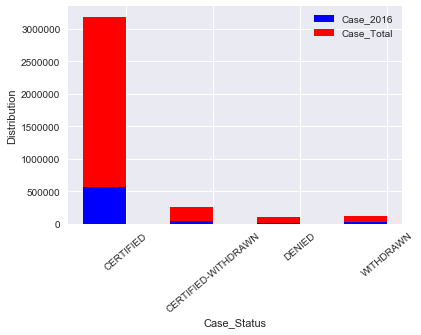

In [37]:
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Case_2016, width, color='b', label='Case_2016')
plt.bar(idx, Case_Total, width, bottom=Case_2016, color='r', label='Case_Total')
plt.xlabel('Case_Status')
plt.ylabel('Distribution')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
